In [51]:
# import other needed libraries
import numpy as np

In [5]:
# Fetch MNIST dataset
from sklearn.datasets import fetch_openml #used for fetching MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The some keys to pay attention to and their description:

| Key      | Description |
| :--------: | :----------- |
| **DESCR**      | Key to describe the dataset |
| **Data**       | An array with 1 row per instance and 1 column per feature |
| **Target**     | Array with labels |

In [42]:
# check mentioned arrays above
x, y = mnist['data'], mnist['target']
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [43]:
images,features = x.shape
print("Database Description:")
print("There are " + str(images) + " images, and each image has " + str(features) + " features." )
print("Features are the number of pixels per image in this case each image = 28 x 28 pixels")
print("There are " + str(y.shape) + " labels in this database")

Database Description:
There are 70000 images, and each image has 784 features.
Features are the number of pixels per image in this case each image = 28 x 28 pixels
There are (70000,) labels in this database


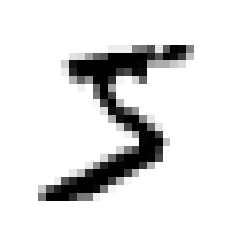

Label:5


In [61]:
# Project a sample image from the dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
x = np.array(x) # convert into a numpy array
y = y.astype(np.uint8) # cast label into an integer format
example_digit = x[0]
example_digit_image = example_digit.reshape(28,28) #reshape the array into a 28 x 28 array

plt.imshow(example_digit_image, cmap="binary")
plt.axis("off") # removes axis

plt.show()
print("Label:" + str(y[0]))

In [62]:
# Create a test set and training set
x_train, x_test, y_train, y_test = x[:6000], x[6000:], y[:6000], y[6000:]

# x_train, y_train contains the first 5999 outputs, labels for the training set
# x_test, y_test contains the remaining outputs, labels for the test set

In [63]:
# Setting up the binary classifier parameters
# Set up the binary classifier to identify where the input returns an output dependent on whether or not the input is a 5.
y_train_5 = (y_train == 5) # condition is true for all inputs == 5, else false
x_train_5 = (y_test == 5)

In [64]:
# Train a Stochastic Gradient Decent (SGD) classifier to implement the classification model
# SGD is named Stochastic because it relies on randomness during training
# Should you want to reproduce the same result you must set the `random_state` parameter
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5) # training data, model condition

SGDClassifier(random_state=42)

In [70]:
# Predict if the input is a 5
# Replace example_digit with x[i] where i = an index of an image in the database
print(sgd_clf.predict([example_digit])[0])

True
